# NLP Predict Disaster Tweet Classifier

### Notebook Description
The following notebook explores a model attempting to classify a set of tweets with the appropriate label: 1 for tweets about real disasters and 0 for tweets not about real disasters.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from funcs import *
import random
import math

/tmp/ipykernel_1966/1131998491.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Loading and Analysis

In [2]:
tweets = pd.read_csv('train.csv')
display(tweets.head(5))
number_tweets = tweets.shape[0]
print(f'{number_tweets} entries with {tweets.shape[1]} features')

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


7613 entries with 5 features


_The following cell selects 7 tweets at random and displays their text contents as well as target_

In [3]:
#checking for label imbalance
num_1 = tweets[tweets['target'] == 1]['target'].count()
num_0 = tweets[tweets['target'] == 0]['target'].count()

print('tweets labeled to describe an actual disaster: ',num_1)
print('tweets labeled NOT to describe an actual disaster: ',num_0)

tweets labeled to describe an actual disaster:  3271
tweets labeled NOT to describe an actual disaster:  4342


In [4]:
for _ in range(7):
    ix = random.randint(0,number_tweets+1)
    print('location: ',ix)
    tweet = tweets.loc[ix,'text']
    display(tweet,tweets.loc[ix,'target'])
    # sent_len_ratio = capitals_vs_sentence_len(tweet) 
    # print(sent_len_ratio)
    print()

location:  2775


'70 Years After Atomic Bombs Japan Still Struggles With War Past: The anniversary of the devastation wrought b... http://t.co/vFCtrzaOk2'

1


location:  2290


'Absurdly Ridiculous Men\x89Ûªs #Fashion To Demolish You #Manhood. http://t.co/vTP8i8QLEn'

0


location:  5625


'reaad/ plsss 12000 Nigerian refugees repatriated from Cameroon'

1


location:  4325


'0-day bug in fully patched OS X comes under active exploit to hijack Macs http://t.co/sbGiRvQvzb'

0


location:  5764


"'Without an ally near you can't use this skill.' How did you get hired? Really cause it's making every Riot staff member look incompetent."

0


location:  1110


'Shadowflame and the Wraith: Bombed http://t.co/LDBaO0rSuz via @amazon'

1


location:  375


'@AP what a violent country get the army involved to help control the killings and bring back peace to the poor people.'

1

### Data Cleaning

In [5]:
cleaning = tweets.groupby('text').nunique().sort_values(by='target',ascending=False)
duplicates = cleaning[cleaning['target'] > 1]
duplicates.rename(columns={'id':'# of duplicates','target':'sum of target var'})

,# of duplicates,keyword,location,sum of target var
text,,,,
like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit,2,2,1,2
Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do anything that leads to it #islam!,2,1,1,2
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.',6,1,1,2
In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!,2,1,2,2
To fight bioterrorism sir.,4,1,0,2
Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her\n \n#FARRAKHAN #QUOTE,3,1,0,2
#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption,3,1,2,2
#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,3,1,3,2
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam,6,1,2,2


In [6]:
dupe_text_list = duplicates.index 
dupe_text_list = list(dupe_text_list)
# manually make label list to iterate
right_labels = [0,0,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,0]
# drop duplicates except for one
clean_train_data = tweets.drop_duplicates(subset=['text'], keep='last').reset_index(drop=True)
# relabel duplicate rows
for i in range(len(dupe_text_list)):
    clean_train_data.loc[clean_train_data['text'] == dupe_text_list[i], 'target'] = right_labels[i]

### Evaluating Text Features

_The following cell contains words selected to develop the model as well as words that did not prove to be useful_

In [7]:
sample_words = ["'",'report','after','evacuat','http','hurricane','earthquake','drought','flood','fire','survivor',\
               'storm','terr',':','police','crash','death','casualt','injur','war']
# ["'",'report','after','evacuation','http','hurricane','earthquake','drought','flood','fire','survivor',\
#                'storm','terr',':','police','crash','death','casualt','injur']

useless_words = ['aid','please','information','notify','authorities','body','rescue','response'\
                'civilian','escape','#news','quarantine','explosion','shoot','colli','hostage','terrorist']

In [8]:
feats = pd.DataFrame()
labels = tweets['target']

feats.loc[:, sample_words] = words_in_texts(sample_words, tweets['text'])
feats.head(1)

,',report,after,evacuat,http,hurricane,earthquake,drought,flood,fire,survivor,storm,terr,:,police,crash,death,casualt,injur,war
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


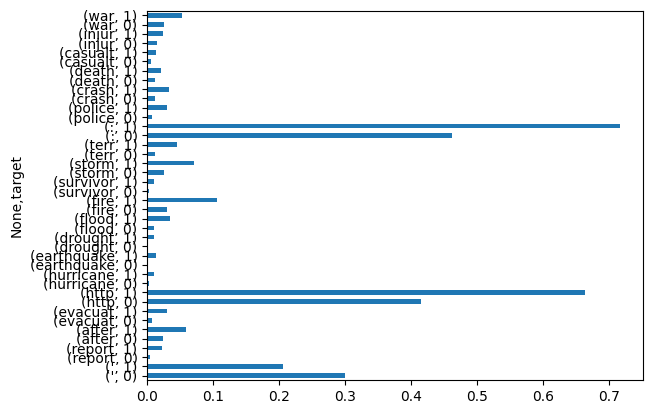

In [9]:
eda_df = feats.join(labels)
graph_comparison = pd.DataFrame(eda_df.groupby('target').mean()).unstack(0).plot.barh();

/tmp/ipykernel_1966/654379560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(eda_df, x='target',y='email len',palette={'0':'r','1':'g'});
/home/ljones333/miniconda3/envs/chem277b/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ljones333/miniconda3/envs/chem277b/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


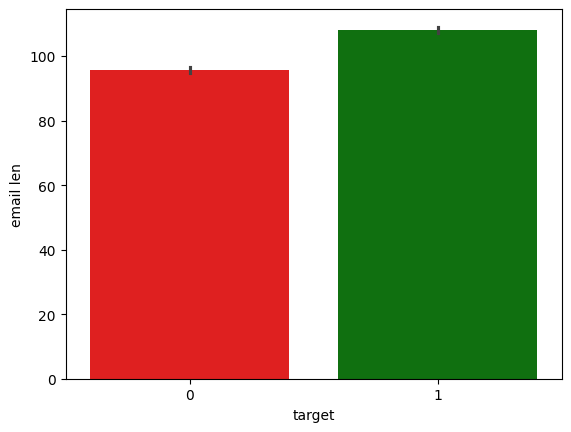

In [10]:
eda_df['email len'] = [len(tweet) for tweet in tweets['text']]
sns.barplot(eda_df, x='target',y='email len',palette={'0':'r','1':'g'});

#### Testing meta feature functions as defined in `funcs.py`

In [22]:
sample_sentence1 = "why is my model attaining low accuracy??."
sample_sentence2 = "Model by Laura Kollmorgen seems to only attain \
a mediocre accuracy LOL.....00"

In [23]:
assert capitals_vs_sentence_len(sample_sentence1) == 0
assert capitals_vs_sentence_len(sample_sentence2) > 0

In [24]:
assert count_periods(sample_sentence1) == 1
assert count_periods(sample_sentence2) == 5

In [25]:
assert count_digits(sample_sentence1) == 0
assert count_digits(sample_sentence2) == 2

_The above EDA was useful in identifying features from the tweets that could contribute to our classifier model_

## Modeling

In [44]:
#imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#misc
import string
import pickle

In [45]:
def tweet_processing(df):
    if df.ndim < 2:
        raise('Yo this df is too small')
        
    #words initially evaluated to become features
    word_features = ["'",'report','after','evacuat','http','hurricane','earthquake','drought','flood','fire','survivor',\
               'storm','terr',':','police','crash','death','casualt','injur','war']
    
    map = dict(zip(range(0,len(word_features)),word_features))
    
    #initializing dataframe from words in texts
    x_df = (pd.DataFrame(words_in_texts(word_features, df['text']))
           .rename(columns=map))

    #adding ratio for words/sentence length
    x_df['capitals vs. sentence length'] = (df['text']
                                            .apply(lambda x: capitals_vs_sentence_len(x))
                                            .values)

    # adding punctuation count
    x_df['num_punctuation'] = (df['text']
                                .apply(lambda x: len([c for c in str(x) if c in string.punctuation])))

    # adding digit count
    x_df['num digits'] = (df['text']
                                .apply(lambda x: count_digits(x))
                                .values)    
    #optional scaling data
    #x_scaled = StandardScaler().fit_transform(x_df)
    
    if 'target' in df.columns:
        # return x_scaled, df['target']
        return x_df, df['target']
    else:
        # return x_scaled, 0
        return x_df, 0

In [46]:
# def tweet_processing(df):
#     if df.ndim < 2:
#         raise('Yo this df is too small')
        
#     #words initially evaluated to become features
#     word_features = ["'",'report','after','evacuat','http','hurricane','earthquake','drought','flood','fire','survivor',\
#                'storm','terr',':','police','crash','death','casualt','injur','war']
    
#     map = dict(zip(range(0,len(word_features)),word_features))
    
#     #initializing dataframe from words in texts
#     x_df = (pd.DataFrame(words_in_texts(word_features, df['text']))
#            .rename(columns=map))

#     #adding ratio for words/sentence length
#     x_df['capitals vs. sentence length'] = (df['text']
#                                             .apply(lambda x: capitals_vs_sentence_len(x))
#                                             .values)

#     # # adding period count. This function actually decreases the model accuracy
#     # x_df['sentence periods'] = (df['text']
#     #                             .apply(lambda x: count_periods(x))
#     #                             .values)

#     # adding digit count
#     x_df['num digits'] = (df['text']
#                                 .apply(lambda x: count_digits(x))
#                                 .values)    
#     #optional scaling data
#     #x_scaled = StandardScaler().fit_transform(x_df)
    
#     if 'target' in df.columns:
#         # return x_scaled, df['target']
#         return x_df, df['target']
#     else:
#         # return x_scaled, 0
#         return x_df, 0

In [55]:
train_and_val = pd.read_csv('train.csv')
#splitting the training data into validation data
train, val = train_test_split(train_and_val,test_size=0.3,random_state=42)
test = pd.read_csv('test.csv')
# print(f'len train df: {train.shape[0]}\nlen val df: {val.shape[0]}\nlen test df: {final_test.shape[0]}')
# print()

# x_train, y_train = tweet_processing(train)

# x_val, y_val = tweet_processing(val)

# x_test, y_test = tweet_processing(final_test)

#### Creating and pickling datasets

In [61]:
#recall that our cleaned dataset was clean_train_data
final_train_x, final_train_y = tweet_processing(clean_train_data)
final_test, trash = tweet_processing(test)
display(pd.DataFrame(final_test))

,',report,after,evacuat,http,hurricane,earthquake,drought,flood,fire,...,:,police,crash,death,casualt,injur,war,capitals vs. sentence length,num_punctuation,num digits
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.029412,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015625,3,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010417,2,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,3,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088889,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.781818,0,0
3259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050360,5,6
3260,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.163636,5,0
3261,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769,7,3


Saving files as pickles....?

In [62]:
final_train_x.to_pickle("./pickles/final_train_x.pkl")
final_test.to_pickle("./pickles/final_test.pkl")

### Baseline Model Results

In [18]:
log_model = LogisticRegression(solver='sag',max_iter = 1000).fit(x_train,y_train)
# (best parameters)  {'C': 1.0, 'fit_intercept': True, 'max_iter': 100, 'solver': 'sag'}
forest_model = RandomForestClassifier(n_estimators=100,random_state=42).fit(x_train,y_train)
linear_model = LinearSVC(random_state = 42).fit(x_train,y_train)

log_score = log_model.score(x_val,y_val)
forest_score = forest_model.score(x_val,y_val)
linear_score = linear_model.score(x_val,y_val)

print(log_score,forest_score, linear_score)

0.6900175131348512 0.6335376532399299 0.6900175131348512


_The above scores measure the baseline capabilities of the logistic regression and random forest classifier models_

### Model Tuning

#### PCA

Variance Ratio By Component:  [0.9037362  0.04025917 0.01829525]


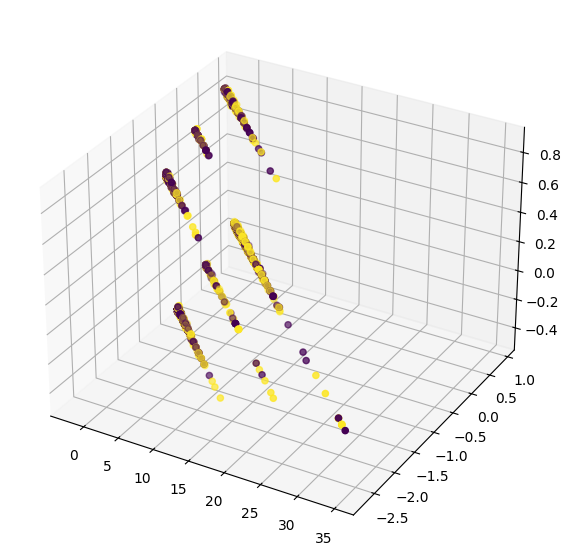

In [19]:
#3 principal components
pca = PCA(n_components=3).fit(x_train)
pca_feats = pca.transform(x_train)

# print(pca.components_)
fig = plt.figure(figsize=(7,7))
axis=fig.add_subplot(111,projection='3d')
axis.scatter(pca_feats[:,0],pca_feats[:,1],pca_feats[:,2],\
             c=y_train);

print('Variance Ratio By Component: ', pca.explained_variance_ratio_)

Variance Ratio By Component:  [0.9037362  0.04025917]


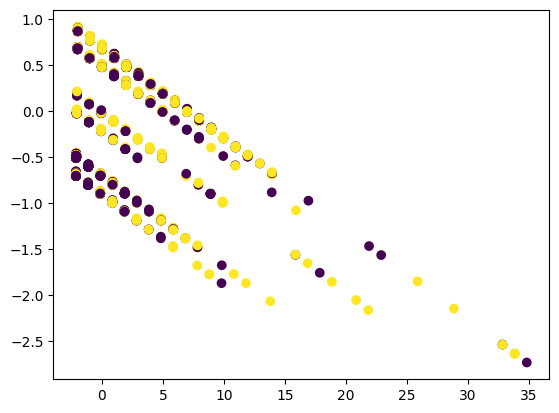

In [20]:
#2 principal components
pca = PCA(n_components=2).fit(x_train)
pca_feats = pca.transform(x_train)

plt.scatter(pca_feats[:,0],pca_feats[:,1], c=y_train);

print('Variance Ratio By Component: ', pca.explained_variance_ratio_)

#### Modeling using PCA

In [21]:
pca_val_x = pca.transform(x_val)

log_model = LogisticRegression(solver='liblinear',max_iter = 1000).fit(pca_feats,y_train)
forest_model = RandomForestClassifier(n_estimators=100,random_state=42).fit(pca_feats,y_train)
linear_model = LinearSVC(random_state = 42).fit(pca_feats,y_train)

log_score = log_model.score(pca_val_x,y_val)
forest_score = forest_model.score(pca_val_x,y_val)
linear_score = linear_model.score(pca_val_x,y_val)

print(log_score,forest_score, linear_score)

0.6322241681260946 0.6208406304728546 0.6317863397548161


_The above results are very interesting, but I suppose not surprising. The PCA revealed little in the way of a definitive hyperplane among the input features._

### Naive Bayes Model Examination

In [26]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [27]:
train_and_val = pd.read_csv('train.csv')
train, val = train_test_split(train_and_val,test_size=0.3,random_state=42)

x_train, y_train = tweet_processing(train)

x_val, y_val = tweet_processing(val)

#### Gaussian Naive Bayes

In [28]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train,y_train).predict(x_val)

print("Number of mislabeled points out of a total %d points : %d"
      % (x_val.shape[0], (y_val != y_pred).sum()))
print("Accuracy: ", ((y_val == y_pred).sum() / x_val.shape[0])) 

Number of mislabeled points out of a total 2284 points : 747
Accuracy:  0.6729422066549913


#### Bernoulli Naive Bayes

In [29]:
bnb = BernoulliNB()
y_pred = bnb.fit(x_train,y_train).predict(x_val)
print("Number of mislabeled points out of a total %d points : %d"
      % (x_test.shape[0], (y_val != y_pred).sum()))
print("Accuracy: ", ((y_test == y_pred).sum() / x_val.shape[0])) 

Number of mislabeled points out of a total 3263 points : 822
Accuracy:  0.48336252189141854


#### Deep Learning Model

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

2024-06-29 10:44:05.717772: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-29 10:44:06.644848: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [31]:
# input_shape = [x_train.shape[1]]

# def create_base_model():
#     keras_model = keras.Sequential([
#         layers.Dense(512,activation='relu',input_shape=input_shape),
#         layers.Dense(1,activation='sigmoid')
#         ])
    
#     keras_model.compile(
#         optimizer='adam',
#         loss='binary_crossentropy',
#         metrics=['accuracy']
#         )
#     return keras_model

# estimator = KerasClassifier(model=create_base_model,epochs=200,batch_size=50,verbose=0)
# kfold = StratifiedKFold(n_splits=10,shuffle=True)
# results = cross_val_score(estimator, x_train, y_train, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

### BERT Classification

In [72]:
import torch
from transformers import BertModel
from transformers import AutoTokenizer
from torch.utils.data import Dataset

from torch.utils.data import DataLoader

Guide for the BERT model and usage followed:
https://towardsdatascience.com/part-1-data-cleaning-does-bert-need-clean-data-6a50c9c6e9fd
https://towardsdatascience.com/does-bert-need-clean-data-part-2-classification-d29adf9f745a

In [73]:
class TextDataset(Dataset):
    def __init__(self, dataframe, max_length=180, tokenizer_name='bert-base-uncased'):
        self.texts = dataframe['text'].values
        self.targets = dataframe['target'].values
        #breaks down targets into tokens
        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
        self.max_length = max_length

    #returns length of texts DF
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        target = self.targets[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()
        
        return {
            'input_ids': torch.as_tensor(input_ids, dtype=torch.long),
            'attention_mask': torch.as_tensor(attention_mask, dtype=torch.long),
            'targets': torch.as_tensor(target, dtype=torch.long),
            'text': text
        }

In [74]:
total_data = clean_train_data
train_data, test_data = train_test_split(train,train_size=0.9,shuffle=True,random_state=42)
print(f'{len(train_data)} Training samples')
print(f'{len(test_data)} Validation samples')

4796 Training samples
533 Validation samples


In [75]:
train_dataset = TextDataset(train_data)
test_dataset = TextDataset(test_data)

In [76]:
#recommended batch size
BATCH_SIZE = 16

torch.manual_seed(42)
train_loader = DataLoader(train_dataset, 
                          batch_size=BATCH_SIZE,
                          shuffle=True)
test_loader = DataLoader(test_dataset,
                         batch_size=len(test_dataset))
next(iter(train_loader))

{'input_ids': tensor([[  101,  9801, 12849,  ...,     0,     0,     0],
         [  101,  1030,  2600,  ...,     0,     0,     0],
         [  101,  2070,  5850,  ...,     0,     0,     0],
         ...,
         [  101,  3930,  2852,  ...,     0,     0,     0],
         [  101,  1030,  2044,  ...,     0,     0,     0],
         [  101,  2182,  1045,  ...,     0,     0,     0]]),
 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 'targets': tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]),
 'text': ['mortal kombat fatalities are so gross but interesting',
  '@RockBottomRadFM Is one of the challenges on Tough Enough rescuing people from burning buildings?',
  'Some drugs and alcohol in Jackson Vroman house.\n\nhttp://t.co/5OQhQ8QUQV',
  '#AyekoRadio play Brasswork Agency - Crushed and Sha

In [77]:
from torch import cuda
torch.cuda.empty_cache()
device = 'cuda' if cuda.is_available() else 'cpu'
from transformers import BertForSequenceClassification, AdamW, BertConfig

import time
import datetime
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

#### Initial ability

In [78]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False,
)

model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [79]:
EPOCHS = 3

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8)

/home/ljones333/miniconda3/envs/chem277b/lib/python3.10/site-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [52]:
training_stats = []
epoch_loss_train = []
total_t0 = time.time()

# TRAINING
for epoch in range(1, EPOCHS + 1):
    model.train()
    t0 = time.time()
    print("")
    print("================ Epoch {:} / {:} ================".format(epoch, EPOCHS))
    train_all_predictions = []
    train_all_true_labels = []
    for step, data in enumerate(train_loader):
        if step % 40 == 0 and not step == 0:
            elapsed = int(round(time.time() - t0))
            elapsed = str(datetime.timedelta(seconds=elapsed))
            print(
                "  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.".format(
                    step, len(train_loader), elapsed
                )
            )

        targets = data["targets"].to(device)
        #used to send batch to transformer even if examples in 
        #batch have varying lengths; used to determine which 
        # tokens are padding
        mask = data["attention_mask"].to(device)
        ids = data["input_ids"].to(device)

        model.zero_grad()

        loss, logits = model(
            ids, token_type_ids=None, attention_mask=mask, labels=targets
        ).to_tuple()
        epoch_loss_train.append(loss.item())

        cpu_logits = logits.cpu().detach().numpy()
        train_all_predictions.extend(np.argmax(cpu_logits, axis=1).flatten())
        train_all_true_labels.extend(targets.cpu().numpy())

        loss.backward()
        optimizer.step()
    train_accuracy = accuracy_score(train_all_true_labels, train_all_predictions)
    train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(
        train_all_true_labels, train_all_predictions, average="binary"
    )
    print("")
    print('---TRAIN METRICS---')
    print(f"Loss: {np.mean(epoch_loss_train):.4f}")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"F1-Score: {train_f1:.4f}")
    print("")
    
    # VALIDATION
    print("Running validation ...")
    print("")
    model.eval()
    epoch_loss_test = []
    test_all_predictions = []
    test_all_true_labels = []
    for data in test_loader:
        targets = data["targets"].to(device)
        mask = data["attention_mask"].to(device)
        ids = data["input_ids"].to(device)
        
        with torch.no_grad():
            loss, logits = model(ids, token_type_ids=None, attention_mask=mask, labels=targets).to_tuple()
            
        epoch_loss_test.append(loss.item())
        cpu_logits = logits.cpu().detach().numpy()
        test_all_predictions.extend(np.argmax(cpu_logits, axis=1).flatten())
        test_all_true_labels.extend(targets.cpu().numpy())
    test_accuracy = accuracy_score(test_all_true_labels, test_all_predictions)
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
        test_all_true_labels, test_all_predictions, average="binary"
    )
    print("")
    print('---TEST METRICS---')
    print(f"Loss: {np.mean(epoch_loss_test):.4f}")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1-Score: {test_f1:.4f}")
    
    training_stats.append(
            {
            'epoch': epoch,
            'Training Loss': np.mean(epoch_loss_train),
            'Training Accuracy': train_accuracy,
            'Training Precision': train_precision,
            'Training Recall': train_recall,
            'Training F1': train_f1,
            'Validation Loss': np.mean(epoch_loss_test),
            'Validation Accuracy': test_accuracy,
            'Validation Precision': test_precision,
            'Validation Recall': test_recall,
            'Validation F1': test_f1
        }
    )


================ Epoch 1 / 3 ================
  Batch    40  of    300.    Elapsed: 0:00:09.
  Batch    80  of    300.    Elapsed: 0:00:17.
  Batch   120  of    300.    Elapsed: 0:00:26.
  Batch   160  of    300.    Elapsed: 0:00:35.
  Batch   200  of    300.    Elapsed: 0:00:44.
  Batch   240  of    300.    Elapsed: 0:00:53.
  Batch   280  of    300.    Elapsed: 0:01:01.

---TRAIN METRICS---
Loss: 0.1346
Accuracy: 0.9504
Precision: 0.9598
Recall: 0.9236
F1-Score: 0.9413

Running validation ...


---TEST METRICS---
Loss: 0.5842
Accuracy: 0.8255
Precision: 0.8469
Recall: 0.7437
F1-Score: 0.7919

================ Epoch 2 / 3 ================
  Batch    40  of    300.    Elapsed: 0:00:09.
  Batch    80  of    300.    Elapsed: 0:00:18.
  Batch   120  of    300.    Elapsed: 0:00:27.
  Batch   160  of    300.    Elapsed: 0:00:37.
  Batch   200  of    300.    Elapsed: 0:00:46.
  Batch   240  of    300.    Elapsed: 0:00:55.
  Batch   280  of    300.    Elapsed: 0:01:05.

---TRAIN METRICS---
L

In [46]:
df_statistics = pd.DataFrame(data=training_stats)
df_statistics = df_statistics.set_index('epoch')
df_statistics

,Training Loss,Training Accuracy,Training Precision,Training Recall,Training F1,Validation Loss,Validation Accuracy,Validation Precision,Validation Recall,Validation F1
epoch,,,,,,,,,,
1,0.448998,0.801918,0.800754,0.719400,0.757900,0.393510,0.834897,0.857143,0.756303,0.803571
2,0.383798,0.877398,0.895243,0.810353,0.850686,0.472887,0.821764,0.826484,0.760504,0.792123
3,0.329232,0.918265,0.935065,0.870827,0.901804,0.558444,0.797373,0.762097,0.794118,0.777778


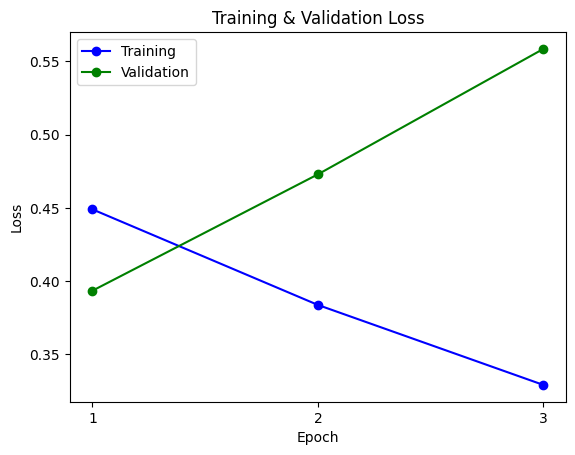

In [47]:
plt.plot(df_statistics['Training Loss'], 'b-o', label='Training')
plt.plot(df_statistics['Validation Loss'], 'g-o', label='Validation')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3])

plt.show()

#### After adding Metafeatures from Model section

In [84]:
def bert_tokenizer(text):
    encoding = tokenizer.encode_plus(
    text,
    max_length=40,
    truncation=True,
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_token_type_ids=False,
    pad_to_max_length=True,
    padding='max_length',
    return_attention_mask=True,
    return_tensors='pt',  # Return PyTorch tensors
    )

    return encoding['input_ids'][0], encoding['attention_mask'][0]

In [85]:
# train data tokenization
train_tokenized_list = []
train_attn_mask_list = []
for text in list(train_list):
    tokenized_text, attn_mask = bert_tokenizer(text)
    train_tokenized_list.append(tokenized_text.numpy())
    train_attn_mask_list.append(attn_mask.numpy())

# test data tokenization
test_tokenized_list = []
test_attn_mask_list = []
for text in list(test_list):
    tokenized_text, attn_mask = bert_tokenizer(text)
    test_tokenized_list.append(tokenized_text.numpy())
    test_attn_mask_list.append(attn_mask.numpy())

NameError: name 'train_list' is not defined

In [48]:
#dataset for submission data
class SubmissionDataset(Dataset):
    def __init__(self, dataframe, max_length=180, tokenizer_name='bert-base-uncased'):
        self.texts = dataframe['text'].values
        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()
        
        return {
            'input_ids': torch.as_tensor(input_ids, dtype=torch.long),
            'attention_mask': torch.as_tensor(attention_mask, dtype=torch.long),
        }

In [49]:
submission_dataset = SubmissionDataset(final_test)
submission_loader = DataLoader(submission_dataset, 
                          batch_size=16)

In [50]:
preds = []
for data in submission_loader:
    mask = data["attention_mask"].to(device)
    ids = data["input_ids"].to(device)
    with torch.no_grad():
        logits = model(ids, token_type_ids=None, attention_mask=mask)[0]
        logits = logits.detach().cpu().numpy()
        flat_predictions = np.argmax(logits, axis=1).flatten()
        preds.extend(flat_predictions)

In [51]:
submission = pd.read_csv("sample_submission.csv")
submission['target'] = preds
submission.to_csv('submission.csv', index=False)

## Outputting Predictions

In [ ]:
output_model  = GaussianNB()
#output_model = LogisticRegression(solver='sag',max_iter = 1000).fit(x_train,y_train)
ids = final_test['id']
y_pred = (pd.DataFrame(output_model.fit(x_train,y_train).predict(x_test))
          .rename(columns={0:'target'})
        )

y_pred.insert(0,'id',value=ids)
display(y_pred.head())
y_pred.to_csv('submission_3.csv',index=False)